# Lack of Robustness of the Markowitz Procedure and the GMV

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_ins as eri
import pandas as pd
import numpy as np

ins30 = eri.get_ins_returns()
er = eri.annualize_rets(ins30["1996":"2000"],12)
cov = ins30["1996":"2000"].cov()

In [4]:
l = ["Food","Steel"]
eri.msr(0.1,er[l],cov.loc[l,l]) # get the result of 75% weight in food and 25% weight in steel

array([0.75040363, 0.24959637])

In [14]:
er[l] #get the expected return of both industry that we used into the calculation MSR

Food     0.116799
Steel    0.115809
dtype: float64

In [15]:
eri.msr(0.1,np.array([.11,.12]),cov.loc[l,l]) #generate the weights allocating into 2 different ins by using new slightly changed return

array([0.57930354, 0.42069646])

In [16]:
eri.msr(0.1,np.array([0.1,0.13]),cov.loc[l,l])

array([0., 1.])

In [5]:
eri.msr(0.1,np.array([0.13,0.10]),cov.loc[l,l])

array([1., 0.])

  As we can see, even slight changes in returns, the portfolio can be totally different.

+ This is called error maximizing nature of Markowitz. In other words, your estimation error is fairly minor but look at the massive shift in portfolio weights. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


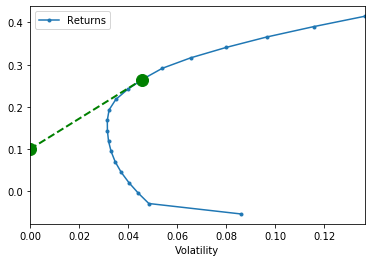

In [17]:
%load_ext autoreload
%autoreload 2
eri.plot_ef(20,er,cov,show_cml=True, riskfree_rate=0.1)

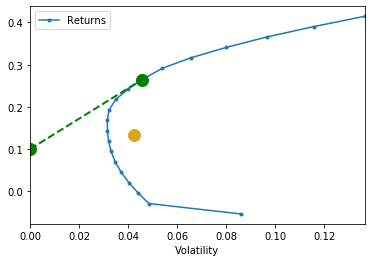

In [18]:
eri.plot_ef(20,er,cov,show_cml=True, riskfree_rate=0.1,show_ew=True) # To get an equal weighted portfolio

+ the portfolio has minimized vol when it is equal weighted

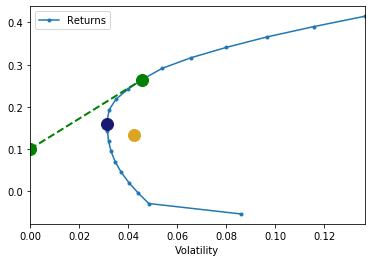

In [19]:
eri.plot_ef(20,er,cov,show_cml=True, riskfree_rate=0.1,show_ew=True,show_gmv=True) # To get the GMV portfolio

+ the blue is Global Minimum Variance portfolio which you just need to estimate the covariance matrix which is much easier than estimating the expected returns
+ it doesn't depend on any estimated returns nd all you have to do is an ecpected return vector
+ the green one is where we want it to be but is hard to be there because it is difficult to get the right expected returns (we don't have the good estimated returns)
+ so if we cannot get to the green one, we can choose the blue or the gold one which require no expected returns on the calculation